In [1]:
# All Expected imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

print("All imports successful!")

All imports successful!


# Module 3 Exit Gate

# Supervised Learning Foundations

**Total Time:** 3.5 hours (210 min)

- Part A: Regression (90 min)
- Part B: Classification (90 min)
- Part C: Conceptual Validation (30 min)

**Rules:**

- No looking at previous notebooks or daily work
- Documentation (sklearn docs, pandas docs) is allowed
- Claude assistance is NOT allowed during the assessment
- Complete each part fully before moving to the next
- Record your actual time for each part

**Passing Criteria:**

- ✅ GREEN: Both models work, appropriate metrics, clear reasoning, all questions answered
- 🟡 YELLOW: Models work but evaluation shallow or conceptual answers weak
- ❌ RED: Can't complete working models or major gaps in understanding

## PART A: Regression Task (90 min)

**Dataset:** California Housing (sklearn)

**Business Context:** A real estate investment firm wants to predict median house values to identify undervalued markets. They need a model that generalizes well to new data and provides interpretable insights about what drives housing prices.

In [2]:
# Setup

from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame


### Deliverables

**A1. Quick EDA (15 min)**

- Dataset shape and column types
- Target variable (MedHouseVal) distribution — create histogram
- Check for missing values
- Note 2-3 observations relevant to modeling


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

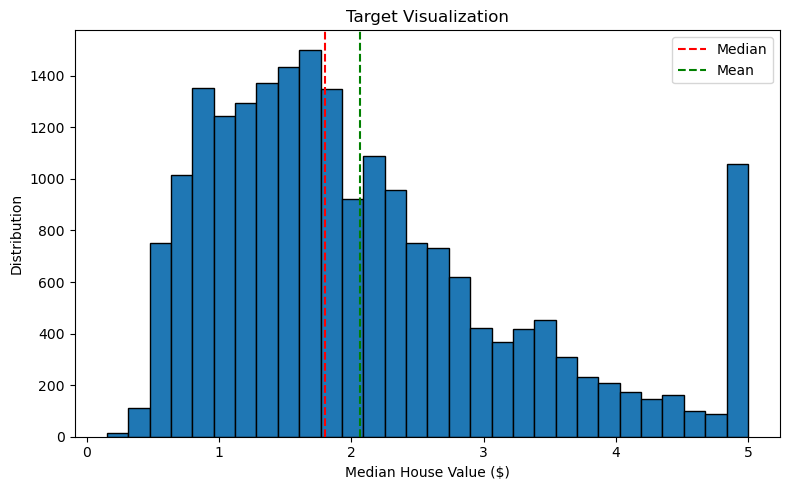

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df['MedHouseVal'], bins=30, edgecolor='black')
plt.axvline(df['MedHouseVal'].median(), linestyle='--', color='red', label='Median')
plt.axvline(df['MedHouseVal'].mean(), linestyle='--', color='green', label='Mean')
plt.xlabel('Median House Value ($)')
plt.ylabel('Distribution')
plt.title('Target Visualization')
plt.legend()
plt.tight_layout()
plt.show()

**A2. Baseline Model**

- Define feature matrix X (all original features) and target y
- Train/test split (80/20, random_state=42)
- Fit LinearRegression on training data
- Evaluate on test data: R², MAE, RMSE
- Record baseline results

In [6]:
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

X = df[feature_cols]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

raw_predict = model.predict(X_test)
raw_r2 = r2_score(y_test, raw_predict)
raw_mae = mean_absolute_error(y_test, raw_predict)
raw_rmse = np.sqrt(mean_squared_error(y_test, raw_predict))

baseline_results = {'raw_r2': raw_r2,
                    'raw_mae': raw_mae,
                    'raw_rmse': raw_rmse}

print(f"Baseline Results:\nRaw R2 Score: {raw_r2:.4f}\nRaw MAE Score: ${raw_mae * 100000:,.0f}\nRaw RMSE Score: ${raw_rmse * 100000:,.0f}")

Baseline Results:
Raw R2 Score: 0.5758
Raw MAE Score: $53,320
Raw RMSE Score: $74,558


**A3. Feature Engineering**

- Create 3 new features from existing columns
- For each feature, write one sentence explaining why it might help predictions
- Re-fit LinearRegression with original + new features
- Evaluate: R², MAE, RMSE
- Did feature engineering improve performance? By how much?

In [7]:
df['bedroom_ratio'] = df['AveBedrms'] / df['AveRooms']
# could help by finding how individual room space and common space may relate to home price

df['rooms_per_person'] = df['AveRooms'] / df['AveOccup']
# could help by finding a correlation between personal space and home price

df['rooms_per_income'] = df['AveRooms'] / df['MedInc']
# could help to determine if number of rooms indicates luxury or economy areas

updated_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'bedroom_ratio', 'rooms_per_person', 'rooms_per_income']

X_eng = df[updated_cols]

X_eng_train, X_eng_test, y_train, y_test = train_test_split(X_eng, y, test_size=0.2, random_state=42)

model.fit(X_eng_train, y_train)

eng_preds = model.predict(X_eng_test)
eng_r2 = r2_score(y_test, eng_preds)
eng_mae = mean_absolute_error(y_test, eng_preds)
eng_rmse = np.sqrt(mean_squared_error(y_test, eng_preds))

engineered_results = {'eng_r2': eng_r2,
                    'eng_mae': eng_mae,
                    'eng_rmse': eng_rmse}

print(f"Engineered Results:\nEng R2 Score: {eng_r2:.4f}\nEng MAE Score: ${eng_mae * 100000:,.0f}\nEng RMSE Score: ${eng_rmse * 100000:,.0f}")

print("="*25)

print("Feature Engineering DID improve performance by:")
print(f"R2 Score: {eng_r2 - raw_r2:.4f}\nMAE Score: ${(raw_mae - eng_mae) * 100000:,.0f}\nRMSE Score: ${(raw_rmse - eng_rmse) * 100000:,.0f}")

Engineered Results:
Eng R2 Score: 0.6519
Eng MAE Score: $48,617
Eng RMSE Score: $67,535
Feature Engineering DID improve performance by:
R2 Score: 0.0762
MAE Score: $4,703
RMSE Score: $7,023


**A4. Model Comparison with Cross-Validation**

- Compare LinearRegression vs Ridge (alpha=1.0) using cross_val_score
- Use 5-fold cross-validation, scoring='r2'
- Report mean R² and standard deviation for each model
- Which model would you recommend and why?

In [8]:
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

updated_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'bedroom_ratio', 'rooms_per_person', 'rooms_per_income']

X = df[updated_cols]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scores_lr = cross_val_score(pipe_lr, X, y, cv=5, scoring='r2')
scores_ridge = cross_val_score(pipe_ridge, X, y, cv=5, scoring='r2')

print(f"LinearRegression CV R²: {scores_lr.mean():.4f} (+/- {scores_lr.std():.4f})")
print(f"Ridge CV R²: {scores_ridge.mean():.4f} (+/- {scores_ridge.std():.4f})")

print("\nQuestion: Which model would you recommend and why?")
print("""\nBecause their results are identical, I would want to continue testing the models before deciding. 
Likely, the Ridge model would show greater results with a higher alpha. I would test to confirm.""")

LinearRegression CV R²: 0.6091 (+/- 0.0483)
Ridge CV R²: 0.6091 (+/- 0.0483)

Question: Which model would you recommend and why?

Because their results are identical, I would want to continue testing the models before deciding. 
Likely, the Ridge model would show greater results with a higher alpha. I would test to confirm.


**A5. Diagnostic Visualizations**
Create two plots for your best model:

1. Residual plot: residuals (y_test - predictions) vs predicted values
2. Actual vs Predicted scatter plot with reference line (where perfect predictions would fall)

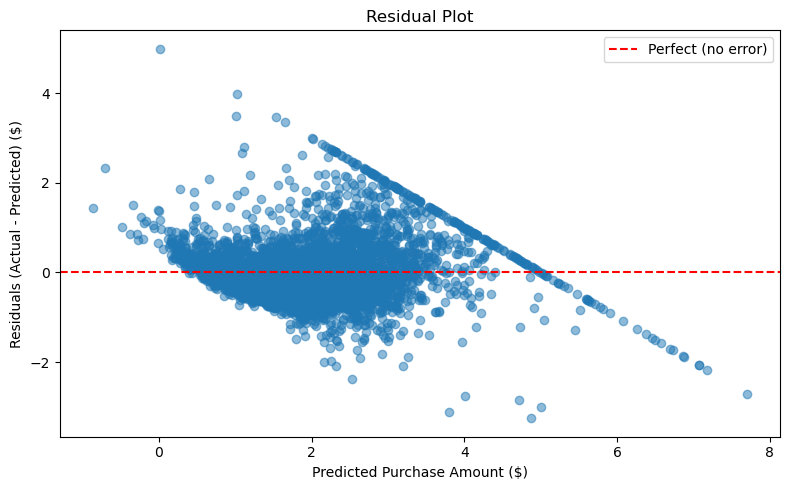

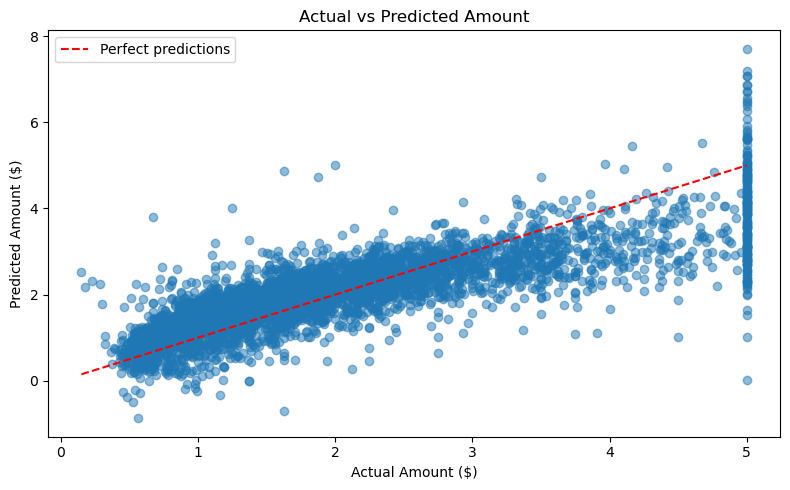

In [9]:
residuals = y_test.values - eng_preds

plt.figure(figsize=(8,5))
plt.scatter(eng_preds, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Perfect (no error)')
plt.xlabel('Predicted Purchase Amount ($)')
plt.ylabel('Residuals (Actual - Predicted) ($)')
plt.title('Residual Plot')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_test, eng_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect predictions')
plt.xlabel('Actual Amount ($)')
plt.ylabel('Predicted Amount ($)')
plt.title('Actual vs Predicted Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Model Coefficients

coef_comparison = pd.DataFrame({
    'feature': updated_cols,
    'LinearRegression': model.coef_
})
print(coef_comparison.round(4))

             feature  LinearRegression
0             MedInc            0.4132
1           HouseAge            0.0102
2           AveRooms           -0.0600
3          AveBedrms           -0.5175
4         Population            0.0000
5           AveOccup           -0.0015
6           Latitude           -0.4146
7          Longitude           -0.4159
8      bedroom_ratio            4.1673
9   rooms_per_person            0.4614
10  rooms_per_income           -0.0048


**A6. Written Analysis (3-5 sentences)**
Summarize for the investment firm:

- **Which model you recommend**

  Based on the findings so far, the leading model is a LinearRegression model, using 3 engineered features in addition to the original features from the dataset. Although I believe the Ridge model might have room for improvement by experimenting with optimal alpha settings, I currently recommend the LinearRegerssion model.

- **What features most influence housing prices (based on coefficients)** (note to claude: You did not have me check coefficients at any point prior to this, so I will do so now and then respond to the question) According to the data, the most impactful features are: bedroom_ratio & AveBedrms.

- **One limitation of your analysis** A primary limitation of my analysis is I have not extended my testing of various models, particularly the Ridge alpha penalty. With further testing, we may find a model capable of better prediction accuracy.

## PART B: Classification Task (90 min)

**Dataset:** Breast Cancer Wisconsin (sklearn)

**CRITICAL ENCODING NOTE:**

- Target value 0 = Malignant (cancer present)
- Target value 1 = Benign (healthy)

**Business Context:** A hospital is implementing an automated screening tool. In this context:

- False Negative (predicting benign when actually malignant) = Patient with cancer goes undetected — potentially fatal
- False Positive (predicting malignant when actually benign) = Unnecessary follow-up tests — stressful but not dangerous

**NOTE TO CLAUDE** I believe you have your business context descriptions inverted. Although what you said is what makes sense, given the nature of the data, since the labeling is inverse to what logic would cause us to assume, it would actually be False Positives that cause someone to be labeled as Benign when actually Malignant, and False Negatives labels someone as Malignant when actually Benign. This has caused both of us constant confusion the entire module, in both Opus and Sonnet work sessions. I believe you have them mixed up here again.

In [11]:
# Setup

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0=malignant, 1=benign

print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


### Deliverables

**B1. Data Inspection**

- Check class distribution (how many malignant vs benign?)
- Is there class imbalance? If so, how severe?



In [12]:
print(df['target'].value_counts())
# 0 = malignant, 1 = benign

print("\nThere appears to be a class imbalance, with ~68.40% more Positives than Negatives")

target
1    357
0    212
Name: count, dtype: int64

There appears to be a class imbalance, with ~68.40% more Positives than Negatives


**B2. Train/Test Split**

- 80/20 split, random_state=42
- Verify class proportions are similar in train and test


In [13]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

target = 'target'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Model is trained!")
print(f"\nX_train shape:\n{X_train.shape}")
print(f"\nX_test shape:\n{X_test.shape}")
print(f"\ny_train shape:\n{y_train.shape}")
print(f"\ny_test shape:\n{y_test.shape}")

Model is trained!

X_train shape:
(455, 30)

X_test shape:
(114, 30)

y_train shape:
(455,)

y_test shape:
(114,)


**B3. Build Two Models**
Build and train:

1. LogisticRegression (default parameters)
2. DecisionTreeClassifier (default parameters)

**NOTE TO CLAUDE**

when running LogisticRegression at default parameters, it returned the following warning message, which influenced me to include random_state and max_iter parameters:
/opt/homebrew/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [14]:
lr_model = LogisticRegression(random_state=42, max_iter=4000)
dt_model = DecisionTreeClassifier(random_state=42)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**B4. Evaluation — For EACH Model:**

Generate predictions on test data, then provide:

a) Confusion Matrix — display as 2x2 grid with labels:

```
              Predicted
              Neg(0)  Pos(1)
Actual Neg(0)   TN      FP
       Pos(1)   FN      TP

```

b) Calculate and report:

- Accuracy
- Precision
- Recall
- F1 Score



LogReg - TN:39, FP:4, FN:1, TP:70
DecTree - TN:40, FP:3, FN:3, TP:68


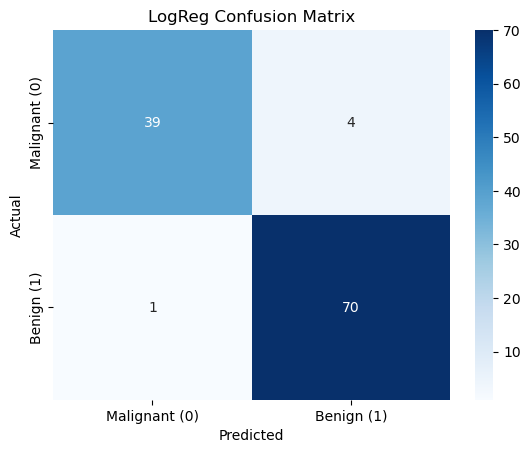

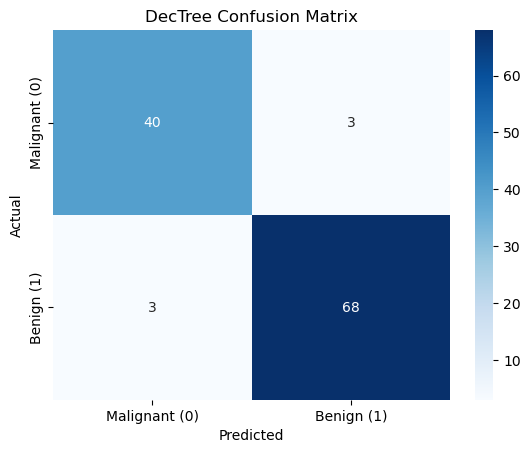

LR Accuracy: 0.956
LR Precision: 0.946
LR Recall: 0.986
LR F1 Score: 0.966
DT Accuracy: 0.947
DT Precision: 0.958
DT Recall: 0.958
DT F1 Score: 0.958


In [15]:
import seaborn as sns

lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

cm_lr = confusion_matrix(y_test, lr_pred)
cm_dt = confusion_matrix(y_test, dt_pred)

tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

print(f"LogReg - TN:{tn_lr}, FP:{fp_lr}, FN:{fn_lr}, TP:{tp_lr}")
print(f"DecTree - TN:{tn_dt}, FP:{fp_dt}, FN:{fn_dt}, TP:{tp_dt}")
print("="*30)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('LogReg Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('DecTree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(f"LR Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print(f"LR Precision: {precision_score(y_test, lr_pred):.3f}")
print(f"LR Recall: {recall_score(y_test, lr_pred):.3f}")
print(f"LR F1 Score: {f1_score(y_test, lr_pred):.3f}")

print(f"DT Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"DT Precision: {precision_score(y_test, dt_pred):.3f}")
print(f"DT Recall: {recall_score(y_test, dt_pred):.3f}")
print(f"DT F1 Score: {f1_score(y_test, dt_pred):.3f}")

**B5. Model Comparison Table**
Create a summary table:

```
| Metric    | LogisticRegression| DecisionTree |
|-----------|-------------------|--------------|
| Accuracy  |      0.956        |      0.947   |
| Precision |      0.946        |      0.958   |
| Recall    |      0.986        |      0.958   |
| F1        |      0.966        |      0.958   |

```


**B6. Business Recommendation (4-6 sentences)**
Given the medical screening context:

- Which model would you deploy?
- Which specific metric drove your decision and why?
- What is the trade-off you're accepting?

In this context, we would typically want to focus on Recall more than Precision, because a False Negative is far more costly, because it could cause loss of life. However, due to the labeling of this dataset being inverted from that logic, we need to focus on the model that can most accurately catch all of the 'Negatives' since those are the patients who are actually Malignant and in need of care. So, given the current inverse setup of the data, we need to focus on Precision. Our best model with the best Precision score is the DecisionTree model, so that is the one currently best suited for deployment. The trade-off here is that a False Negative which flags someone as Malignant when they are actually benign will lead to additional testing, but that only costs a bit of time and effort. However a False Positive that labels someone as Benign when they are Malignant, could cost a life. So we need to focus on saving lives, more than we focus on saving time.
**And, note to Claude,** part of that response is because I am trying to answer in the way I feel you expect to hear. However, given this context and the inverse set up of the target data, I wonder if we really should prioritize the Accuracy score or the F1 Score, which give us better overall chances of catching all of the Malignant patients. Which, again, given the nature of this subject, that needs to be where all of our model's ability should be directed.

## PART C: Conceptual Validation (30 min)

Answer each question in the space indicated. Write clearly and precisely.

**C1. Bias-Variance Tradeoff (3-4 sentences)**

A junior data scientist asks: "I keep hearing about the bias-variance tradeoff but I don't really get it. Can you explain what it means in simple terms?"

Write your explanation. You may use an analogy if helpful.

A simple way to remember it is that bias = underfitting, and variance = overfitting. The tradeoff tends to be that sometimes we can slightly underfit the model (bias) in order to have better performance over time. For instance, a Ridge Regression model (sum of squared residuals) may have a slightly worse fit to training data than a Linear Regression model (least squares), but can perform better over time.

---

**C2. Overfitting Diagnosis (2-3 sentences + list)**

A model shows these results:

- Training R² = 0.94
- Test R² = 0.58

a) What problem does this indicate? This indicates classic overfitting. The model has memorized noise in the training data rather than learning patterns, and is not generalizing well to new data. 
b) List two specific techniques to address this problem. 1. Scrutinize the training data to see if we need to remove noise (unnecessary features) or possibly add useful features that help illustrate where patterns are (feature engineering). 2. Regularization (Ridge/Lasso with higher alpha)

---

**C3. Feature Engineering Scenario (2-3 sentences per feature)**

You're building a model to predict monthly apartment rental prices. The dataset contains:

- square_feet
- num_bedrooms
- num_bathrooms
- floor_number (1-20)
- building_age_years

Propose two engineered features. For each:

- Write the formula or logic
- Explain why it might improve predictions

df['skyline_factor'] = (df['floor_number'] - 1) / 19 

This feature could let us determine if there is an altitude premium that tenants are willing to pay for a view, or a convenience premium they are willing to pay for being closer to ground level.

df['space_efficiency'] = df['square_feet'] / (df['num_bedrooms'] + df['num_bathrooms'])

This feature could allow us to determine the breathability of the space. Meaning, equal square footage can feel spacious in one layout, but cramped in another layout that is more divided by having more separate rooms.


---

**C4. Scaling Decision (2-3 sentences per algorithm)**

Your teammate is comparing KNN vs Random Forest for a classification task. They ask: "Should I scale my features before training?"

What is your advice for:
a) KNN — scale or not? Why? KNN is a prime candidate for scaling because it is a distance-based algorithm. It creates prediction based on each predictions neighboring predictions, if one feature is at a different magnitude, it will dominate the rest of the data. It is vital to have all features scaled uniformly.
b) Random Forest — scale or not? Why? There is no need to scale a Random Forest, because it is a tree-based model. It splits on individual feature thresholds, which don't depend on other features' scales.

## Time Tracking

Record your actual times:

- Part A: 59:02 min (target: 90)
- Part B: 48:36 min (target: 90)
- Part C: 22:31 min (target: 30)
- Total: 130:09 min

## Submission Checklist

Before submitting, verify:

**Part A:**

- [x]  EDA completed with histogram and observations
- [x]  Baseline R², MAE, RMSE recorded
- [x]  3 engineered features with justifications
- [x]  Feature-engineered model R², MAE, RMSE recorded
- [x]  Cross-validation comparison completed
- [x]  Two diagnostic plots created
- [x]  Written analysis completed

**Part B:**

- [x]  Class distribution checked
- [x]  Two models trained
- [x]  Confusion matrix for each model (with labels)
- [x]  Four metrics calculated for each model
- [x]  Comparison table completed
- [x]  Business recommendation with metric justification

**Part C:**

- [x]  All four questions answered
- [x]  Answers are specific and precise (not vague)

### When complete:
**Save all work, commit to git, then provide your complete submission for evaluation.**